<a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/model_monitoring/model_monitoring.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Cognifyz Internship Program**
## Restaurant Data Analysis - Level 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cognifyz_DA_Internship/Dataset .csv')

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.shape

(9551, 21)

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## **Task 1: Restaurant Ratings**

### Analyze the distribution of aggregate ratings


In [ ]:
rating_counts = df['Aggregate rating'].value_counts().sort_index()

In [ ]:
print("Distribution of Aggregate Ratings:\n", rating_counts)

Distribution of Aggregate Ratings:
 Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


### Determine the most common rating range

In [ ]:
# Determine the most frequent rating range
most_common_rating = rating_counts.idxmax()
print("\nThe most common aggregate rating is:", most_common_rating)


The most common aggregate rating is: 0.0


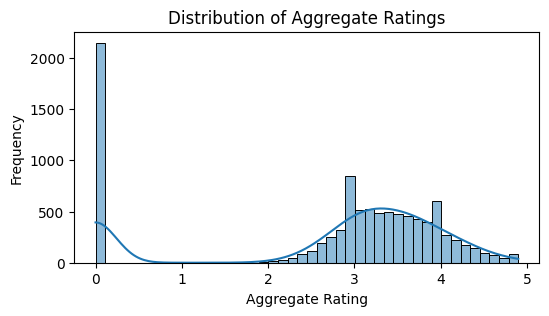

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(df['Aggregate rating'], kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

### Calculate the average number of votes received by restaurants

In [ ]:
avg_vote = round(df['Votes'].mean(), 2)
print("The Average Number of Votes Received by Restaurants: ", avg_vote)

The Average Number of Votes Received by Restaurants:  156.91


## **Task 2: Cuisine Combination**

### Identify the most common combinations of cuisines

In [ ]:
common_combinations = df['Cuisines'].value_counts()

In [ ]:
print("Most common cuisine combinations:")
print(common_combinations.head(10))

Most common cuisine combinations:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


### Determine if certain cuisine combinations tend to have higher ratings

In [ ]:
top_combinations_by_avg_rating = df.groupby('Cuisines')['Aggregate rating'].mean()

In [ ]:
max_rating = top_combinations_by_avg_rating.max()
top_rated_combinations = top_combinations_by_avg_rating[top_combinations_by_avg_rating == max_rating]
print("Cuisine combinations tend to have highest rating:\n", top_rated_combinations)

Cuisine combinations tend to have highest rating:
 Cuisines
American, BBQ, Sandwich            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
American, Sandwich, Tea            4.9
BBQ, Breakfast, Southern           4.9
Burger, Bar Food, Steak            4.9
Continental, Indian                4.9
European, Asian, Indian            4.9
European, Contemporary             4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Italian, Bakery, Continental       4.9
Italian, Deli                      4.9
Mexican, American, Healthy Food    4.9
Mughlai, Lucknowi                  4.9
Sunda, Indonesian                  4.9
World Cuisine                      4.9
Name: Aggregate rating, dtype: float64


## **Task 3: Geographic Analysis**

### Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", mapbox_style="open-street-map",
                        hover_name="Restaurant Name", hover_data=["Aggregate rating", "Cuisines"],
                        zoom=2, height=500)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Identify any patterns or clusters of restaurants in specific areas.

In [ ]:
from sklearn.cluster import KMeans

# Prepare the data (Latitude, Longitude)
coords = df[['Latitude', 'Longitude']].dropna()

kmeans = KMeans(n_clusters=5, random_state=0).fit(coords)
df['kmeans_cluster'] = kmeans.labels_

In [ ]:
fig_kmeans = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", mapbox_style="open-street-map",
                               hover_name="Restaurant Name",
                               color="kmeans_cluster",
                               zoom=2, height=500)
fig_kmeans.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_kmeans.show()

In [ ]:
# Analyze clusters to identify characteristics of each group
for cluster in df['kmeans_cluster'].unique():
  print(f"\nCluster {cluster}:")
  print(df[df['kmeans_cluster'] == cluster]['Cuisines'].value_counts())


Cluster 0:
Cuisines
North Indian                              877
North Indian, Chinese                     477
Fast Food                                 329
Chinese                                   327
North Indian, Mughlai                     322
                                         ... 
Andhra                                      1
North Indian, Andhra, Mughlai               1
Italian, North Indian, South Indian         1
Cafe, Continental, European, Beverages      1
American, Fast Food, Steak, Beverages       1
Name: count, Length: 1410, dtype: int64

Cluster 2:
Cuisines
North Indian                                   59
North Indian, Chinese                          34
Bakery                                         26
Bakery, Desserts                               23
Cafe                                           22
                                               ..
Pizza, Italian                                  1
North Indian, Mughlai, Chinese, Mangalorean     1
North Indian

## **Task 4: Restaurant Chains**

### Identify if there are any restaurant chains present

In [ ]:
restaurant_counts = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts > 1]

if not restaurant_chains.empty:
    print("Restaurant Chains identified:\n")
    print(restaurant_chains)
else:
    print("No restaurant chains found in the dataset.")

Restaurant Chains identified:

Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


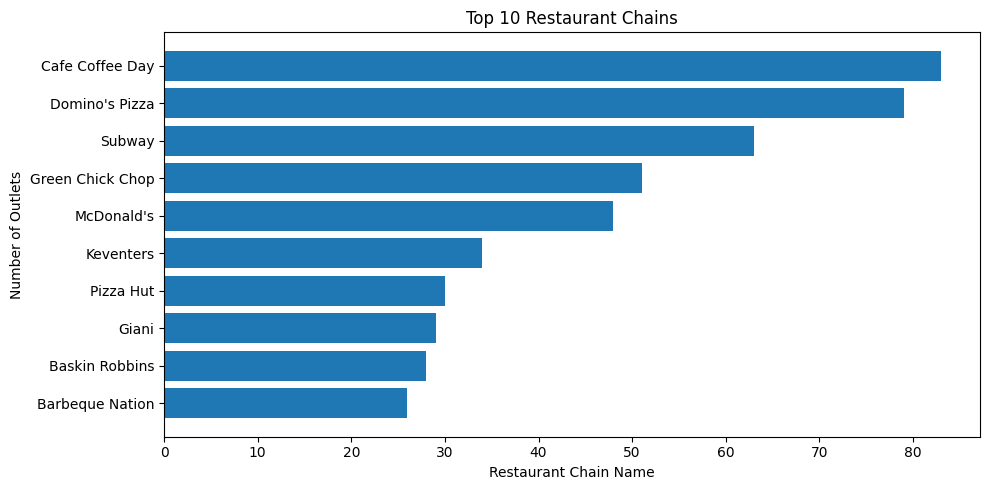

In [ ]:
top_10_chains = restaurant_chains.head(10).sort_values(ascending=True)

plt.figure(figsize=(10, 5))
plt.barh(top_10_chains.index, top_10_chains.values)
plt.xlabel("Restaurant Chain Name")
plt.ylabel("Number of Outlets")
plt.title("Top 10 Restaurant Chains")
plt.tight_layout()
plt.show()

### Analyze the ratings

In [ ]:
ratings = df.groupby("Restaurant Name")["Aggregate rating"].mean()
ratings = ratings.reset_index(name="Average Rating")
ratings = ratings.sort_values(by="Average Rating", ascending=False)
ratings

,Restaurant Name,Average Rating
5322,Restaurant Mosaic @ The Orient,4.9
4177,Ministry of Crab,4.9
4135,Miann,4.9
5757,Shorts Burger and Shine,4.9
4165,Milse,4.9
...,...,...
1105,Cafe Corner,0.0
4905,Pheva Tandooris,0.0
4913,Pick & Carry,0.0
1096,Cafe Brownie,0.0


### Analyze popularity of different restaurant chains

In [ ]:
votes = df.groupby("Restaurant Name")["Votes"].sum()
votes = votes.reset_index(name="Total Votes")
votes = votes.sort_values(by="Total Votes", ascending=False)
votes

,Restaurant Name,Total Votes
663,Barbeque Nation,28142
101,AB's - Absolute Barbecues,13400
6943,Toit,10934
785,Big Chill,10853
2297,Farzi Cafe,10098
...,...,...
4375,Muncheezz,0
6217,Swiss Gourmessa,0
2110,Dosa and Pizza Corner,0
6215,Sweets n Treats,0


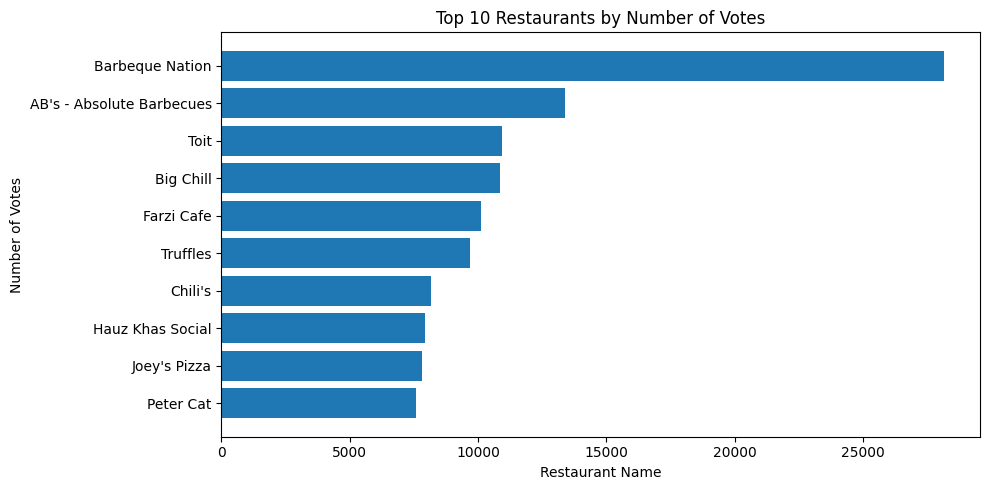

In [ ]:
plt.figure(figsize=(10, 5))
top_10_votes = votes.head(10).sort_values(by='Total Votes', ascending=True)
plt.barh(top_10_votes['Restaurant Name'], top_10_votes['Total Votes'])
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Votes')
plt.title('Top 10 Restaurants by Number of Votes')
plt.tight_layout()
plt.show()